In [54]:
import random
import math
from statistics import mean
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.stats as stats
import pylab as pl

In [55]:
def rollDice():
    roll = random.randint(1,6)
    return roll

In [56]:
roll = rollDice()
print(roll)
myList = [1,2,3]
if roll in myList:
    print('win')

5


In [57]:
def bet():
    win = [7,11]
    loss = [2,3,12]
    diceOne = rollDice()
    #print("Dice One:",diceOne)
    diceTwo = rollDice()
    #print("Dice Two:",diceTwo)
    point = diceOne+diceTwo
    #print("Point Value:",point)
    if point in win:
        #print('Win')
        return True
    elif point in loss:
        #print('Loss')
        return False
    else:
        winCondition = False
        while winCondition == False:
            newRoll = rollDice()+rollDice()
            #print('New Roll:',newRoll)
            if newRoll == point:
                return True
            elif newRoll == 7:
                return False

In [103]:
x=0
while x<5:
    print(bet())
    x=x+1

True
True
True
False
False


In [112]:
flip = random.randint(0,1)
print(flip)
if flip:
    print('yes')
else:
    print('no')

1
yes


In [150]:
def game(length,initialWager,initialFunds,circleCount, Pass):
    funds = initialFunds
    wager = initialWager
    currentWager = 0
    wX = []
    vY = []
    for i in range(0,length):
        pot = circleCount*wager
        #print('Pot: $',pot)
        if funds > 0:
            if i%circleCount == 0: #You bet pass when its your turn
                othersFor = random.randint(0,circleCount-1)
#                 print('People Passing:',othersFor)
#                 print('I am shooter')
                if bet():
                    funds += pot/(othersFor+1) #win
#                     print('win',funds)
#                     print(pot/(othersFor+1))
                else:
                    funds -= wager #loss
#                     print('loss',funds)
            else: #When its not your turn:
                othersFor = random.randint(1,circleCount-1)
#                 print('People Passing:',othersFor)
                flip = random.randint(0,1) #coin flip
                if Pass: #if your strategy is to always bet for the shooter:
                    if bet(): #win
                        funds += pot/(othersFor+1)
#                         print('win')
                    else:
                        funds -= wager #loss
#                         print('loss')
                elif Pass == None: #if your strategy is random
                    if flip: #if you bet for the shooter:
#                         print('Pass')
                        if bet():
                            funds += pot/(othersFor+1) #win
#                             print('win',funds)
#                             print(pot/(othersFor+1))
                        else:
                            funds -= wager #loss
#                             print('loss',funds)
                    else: #if you bet against the shooter
#                         print('No pass')
                        if bet():
                            funds -= wager #loss
#                             print('loss',funds)
                        else:
                            funds += pot/(circleCount-othersFor) #win
#                             print('win',funds)
#                             print(pot/(circleCount-othersFor))
                else: #if your strategy is to always bet against the shooter
                    if bet():
                        funds -= wager #loss
#                         print('loss')
                    else:
                        funds += pot/(circleCount-othersFor) #win
#                         print('win')
            wX.append(currentWager)
            vY.append(funds)
            currentWager += 1
#             print()
    plt.plot(wX,vY)
    return(funds)

5.330000000000005

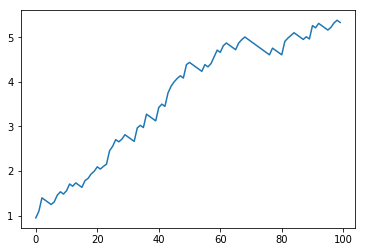

In [152]:
game(100,0.05,1.00,6,None)

In [93]:
boolean = None
if boolean:
    print('yes')
elif boolean == None:
    print('maybe')
else:
    print('no')

maybe


In [159]:
def bettingSim(length, playerCount,initialFunds,initialWager,circleCount, Pass):
    funds = initialFunds
    x = 0
    broke = 0
    profit = 0
    loss = 0
    fundsList = []
    while x < playerCount:
        fundsList.append(game(length,initialWager,initialFunds,circleCount, Pass))
        if fundsList[x] > funds:
            profit += 1
        elif fundsList[x] < funds:
            loss += 1
        if fundsList[x] <= 0:
            broke += 1
        x+=1
    #print(mean(fundsList))
    df = pd.DataFrame(fundsList)
    df.describe()
    plt.ylabel('$ Value')
    plt.xlabel('Round Count')
    #plt.show()
    plt.savefig('streetDiceSim.png',dpi=800)
#     ls = sorted(fundsList)
#     fit = stats.norm.pdf(ls, np.mean(ls), np.std(ls))
#     pl.plot(ls,fit,'-o')
#     pl.hist(ls,normed=True)
#     pl.savefig('streetDiceSimDist.png',dpi=800)
    print(df.describe())
    print('Percent of players who made money:',(profit/playerCount)*100,'%')
    print('Percent of players who lost money:',(loss/playerCount)*100,'%')
    print('Percent of players who went broke:',(broke/playerCount)*100,'%')
    return(fundsList)
    

                   0
count    1000.000000
mean    93511.897222
std      7574.498375
min     70944.444444
25%     88405.952381
50%     93422.420635
75%     98502.777778
max    120413.095238
Percent of players who made money: 100.0 %
Percent of players who lost money: 0.0 %
Percent of players who went broke: 0.0 %


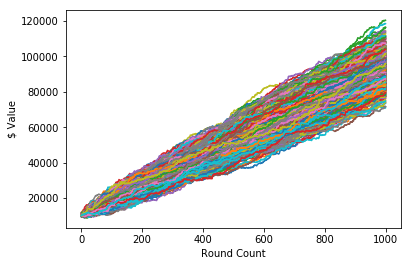

In [166]:
values = bettingSim(1000,1000,10000,100,10,None)

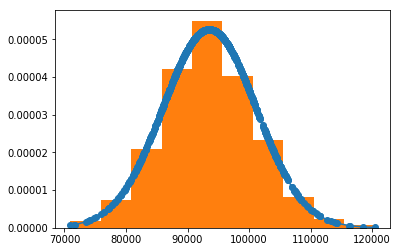

In [167]:
ls = sorted(values)
fit = stats.norm.pdf(ls, np.mean(ls), np.std(ls))
pl.plot(ls,fit,'-o')
pl.hist(ls,normed=True) 
pl.savefig('diceDist.png',dpi=800)

                 0
count  1000.000000
mean     44.278350
std       3.473706
min      34.005000
25%      42.093750
50%      44.375000
75%      46.685000
max      54.885000
Percent of players who made money: 100.0 %
Percent of players who lost money: 0.0 %
Percent of players who went broke: 0.0 %


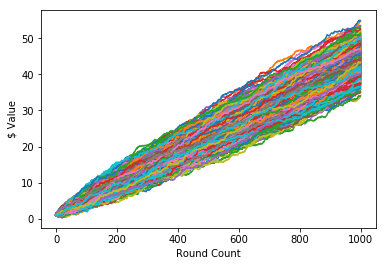

In [157]:
bettingSim(1000,1000,1.00,0.05,6,False)

                 0
count  1000.000000
mean     32.852640
std       3.077132
min      23.350000
25%      30.728750
50%      32.732500
75%      34.968750
max      43.370000
Percent of players who made money: 100.0 %
Percent of players who lost money: 0.0 %
Percent of players who went broke: 0.0 %


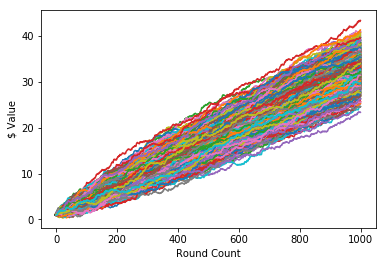

In [158]:
bettingSim(1000,1000,1.00,0.05,6,None)

                 0
count  1000.000000
mean      1.728115
std       0.456072
min       0.560000
25%       1.392500
50%       1.715000
75%       2.035000
max       3.070000
Percent of players who made money: 95.19999999999999 %
Percent of players who lost money: 4.8 %
Percent of players who went broke: 0.0 %


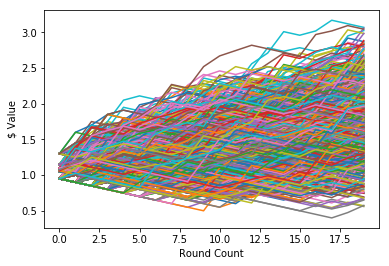

In [124]:
bettingSim(20,1000,1.00,0.05,6,None)